## CNN Code

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6442 - loss: 0.5831 - val_accuracy: 0.8615 - val_loss: 0.3311
Epoch 2/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9026 - loss: 0.2477 - val_accuracy: 0.8712 - val_loss: 0.3030
Epoch 3/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9451 - loss: 0.1538 - val_accuracy: 0.8811 - val_loss: 0.3010
Epoch 4/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9649 - loss: 0.0931 - val_accuracy: 0.8689 - val_loss: 0.3366
Epoch 5/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9813 - loss: 0.0581 - val_accuracy: 0.8623 - val_loss: 0.4200


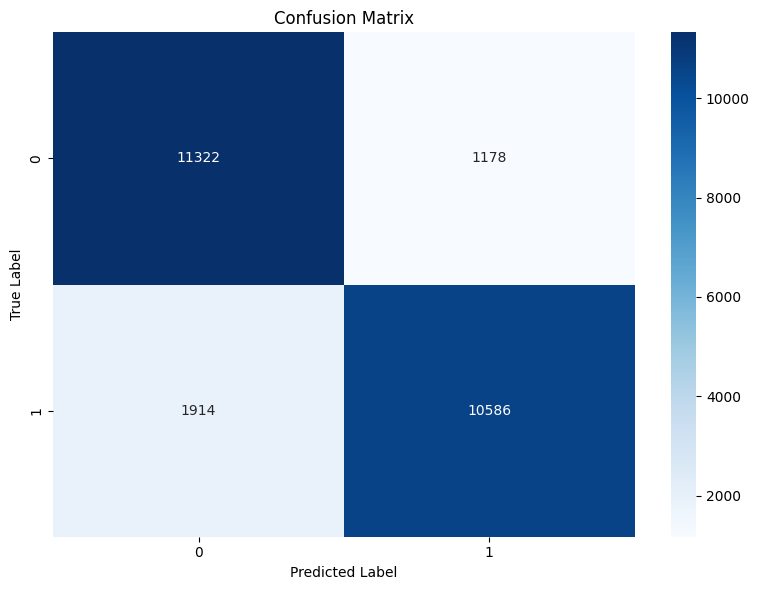

Evaluation Metrics:
Accuracy:  0.8763
Precision: 0.8999
Recall:    0.8469
F1-Score:  0.8726


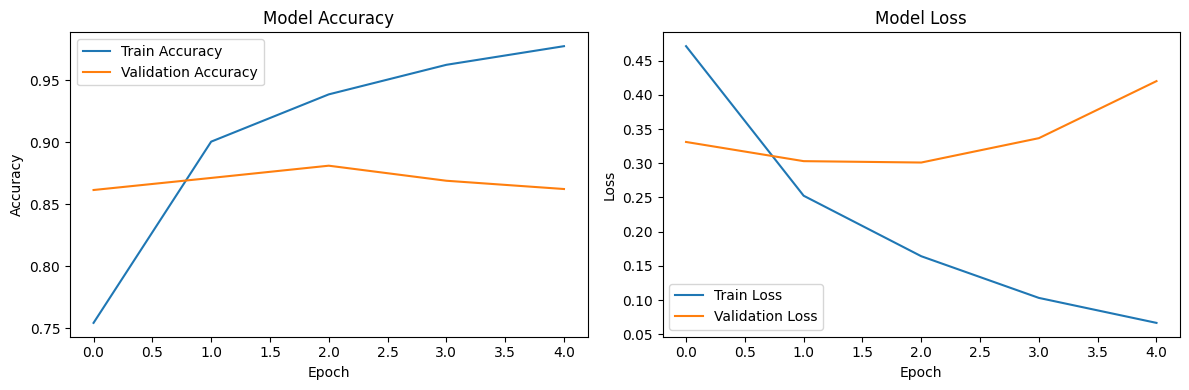


Custom Sentence Sentiment Analysis:
Input Text: this movie was fantastic i loved it
Predicted Sentiment: Positive
Confidence: 99.83%
---
Input Text: absolutely terrible the worst film ever
Predicted Sentiment: Negative
Confidence: 99.96%
---
Input Text: not bad but could have been better
Predicted Sentiment: Negative
Confidence: 57.83%
---
Input Text: i enjoyed the story and the acting was great
Predicted Sentiment: Positive
Confidence: 97.10%
---
Input Text: awful boring and not worth watching
Predicted Sentiment: Negative
Confidence: 95.16%
---


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import re

# Load and preprocess IMDB dataset
def load_imdb_data(num_words=10000, max_length=500):
    # Load IMDB dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=num_words)
    # Pad sequences to ensure uniform input size
    x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
    x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')
    return x_train, y_train, x_test, y_test

# Prepare tokenizer aligned with IMDB word index
def prepare_tokenizer():
    word_index = tf.keras.datasets.imdb.get_word_index()
    tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
    tokenizer.word_index = {k: (v + 3) for k, v in word_index.items()}  # Offset to align with IMDB preprocessing
    tokenizer.word_index["<PAD>"] = 0
    tokenizer.word_index["<START>"] = 1
    tokenizer.word_index["<UNK>"] = 2
    tokenizer.word_index["<UNUSED>"] = 3
    return tokenizer

# Clean input text for consistency
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-z0-9\s]", "", text)  # Remove punctuation
    return text

# Create improved CNN model
def create_cnn_model(embedding_dim=128, filters=128, kernel_size=5,
                     dropout_rate=0.5, learning_rate=0.001):
    model = Sequential([
        # Embedding layer
        Embedding(10000, embedding_dim, input_length=500),

        # Convolutional layers
        Conv1D(filters, kernel_size, activation='relu', padding='same'),
        Dropout(dropout_rate),
        Conv1D(filters // 2, kernel_size, activation='relu', padding='same'),
        GlobalMaxPooling1D(),

        # Fully connected layers
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Comprehensive evaluation function
def evaluate_model(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_binary)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    # Print metrics
    print("Evaluation Metrics:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

# Predict sentiment for custom input text
def predict_sentiment(model, tokenizer, text):
    text = clean_text(text)  # Preprocess input text
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=500, padding='post', truncating='post')
    prediction = model.predict(padded_seq, verbose=0)[0][0]

    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"Input Text: {text}")
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Confidence: {confidence:.2%}")

# Main function
def main():
    # Load and preprocess IMDB data
    x_train, y_train, x_test, y_test = load_imdb_data()
    tokenizer = prepare_tokenizer()

    # Split training data into train and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

    # Create and train the CNN model
    model = create_cnn_model()
    history = model.fit(
        x_train, y_train,
        epochs=15,  # More epochs
        batch_size=16,  # Smaller batch size
        validation_data=(x_val, y_val),
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)],
        verbose=1
    )

    # Evaluate model on test data
    y_pred = model.predict(x_test, verbose=0)
    evaluate_model(y_test, y_pred)

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Custom input predictions
    test_sentences = [
        "This movie was fantastic, I loved it!",
        "Absolutely terrible, the worst film ever.",
        "Not bad, but could have been better.",
        "I enjoyed the story and the acting was great.",
        "Awful, boring, and not worth watching."
    ]
    print("\nCustom Sentence Sentiment Analysis:")
    for sentence in test_sentences:
        predict_sentiment(model, tokenizer, sentence)
        print("---")

# Run the main function
if __name__ == '__main__':
    main()

# LSTM

Loading dataset...
Preparing data...
Creating model...
Training model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.6526 - loss: 0.6034 - val_accuracy: 0.7968 - val_loss: 0.4618
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8690 - loss: 0.3274 - val_accuracy: 0.8648 - val_loss: 0.3252
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9106 - loss: 0.2386 - val_accuracy: 0.8568 - val_loss: 0.3805
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.8828 - loss: 0.2915 - val_accuracy: 0.8552 - val_loss: 0.4128
Evaluating model...
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


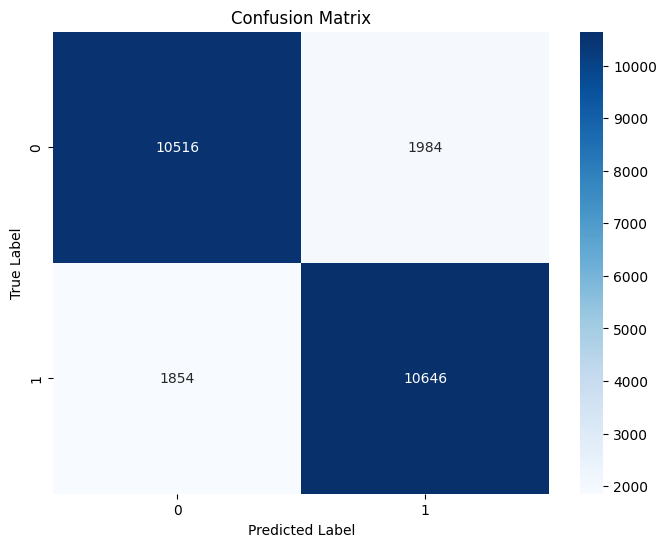

Accuracy: 0.8465
Precision: 0.8429
Recall: 0.8517
F1-Score: 0.8473


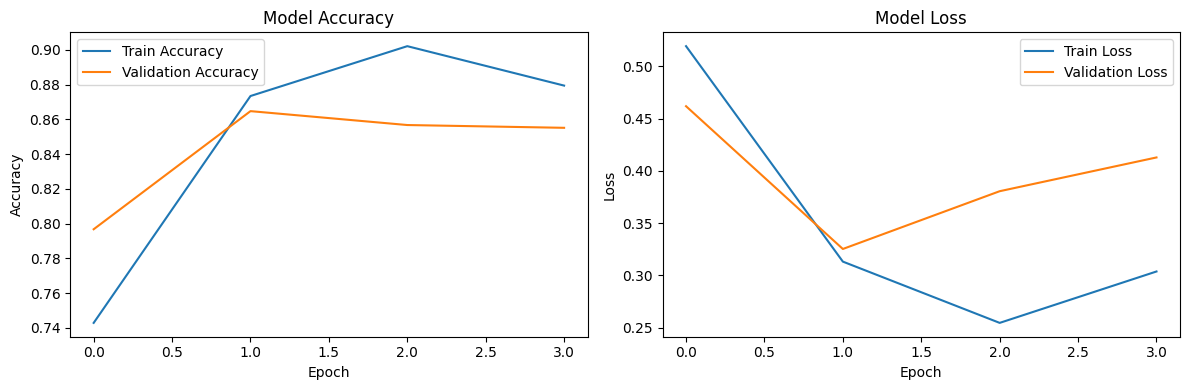

Testing custom sentences...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Input Text: This movie was fantastic, I loved it!
Predicted Sentiment: Positive
Confidence: 67.82%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Input Text: Absolutely terrible, the worst film ever.
Predicted Sentiment: Negative
Confidence: 97.62%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Input Text: Not bad, but could have been better.
Predicted Sentiment: Negative
Confidence: 90.08%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Input Text: I enjoyed the story and the acting was great.
Predicted Sentiment: Positive
Confidence: 66.36%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Input Text: Awful, boring, and not worth watching.
Predicted Sentiment: Negative
Confidence: 95.33%


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load IMDB data
def load_imdb_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
    return x_train, y_train, x_test, y_test

# Prepare tokenizer
def prepare_tokenizer():
    word_index = tf.keras.datasets.imdb.get_word_index()
    word_index = {k: (v + 3) for k, v in word_index.items()}
    word_index["<PAD>"] = 0
    word_index["<START>"] = 1
    word_index["<UNK>"] = 2
    word_index["<UNUSED>"] = 3
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token="<UNK>")
    tokenizer.word_index = word_index
    tokenizer.index_word = reverse_word_index
    return tokenizer

# Prepare data
def prepare_data(x_train, x_test, max_length=200):
    x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
    x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')
    return x_train, x_test

# Create LSTM model
def create_lstm_model(embedding_dim=100, lstm_units=64, dropout_rate=0.3, max_length=200):
    model = Sequential([
        Embedding(10000, embedding_dim, input_length=max_length),
        Dropout(0.2),
        Bidirectional(LSTM(lstm_units, return_sequences=True)),
        Dropout(dropout_rate),
        Bidirectional(LSTM(lstm_units)),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Evaluate model
def evaluate_model(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    cm = confusion_matrix(y_true, y_pred_binary)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return accuracy, precision, recall, f1

# Predict sentiment
def predict_sentiment(model, tokenizer, text, max_length=200):
    sequence = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded_seq)[0][0]

    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    print(f"Input Text: {text}")
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Confidence: {confidence:.2%}")
    return sentiment, confidence

# Main function
def main():
    print("Loading dataset...")
    x_train, y_train, x_test, y_test = load_imdb_data()

    print("Preparing data...")
    x_train, x_test = prepare_data(x_train, x_test)

    print("Creating model...")
    model = create_lstm_model()

    print("Training model...")
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=1)

    print("Evaluating model...")
    y_pred = model.predict(x_test)
    evaluate_model(y_test, y_pred)

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("Testing custom sentences...")
    tokenizer = prepare_tokenizer()
    test_sentences = [
        "This movie was fantastic, I loved it!",
        "Absolutely terrible, the worst film ever.",
        "Not bad, but could have been better.",
        "I enjoyed the story and the acting was great.",
        "Awful, boring, and not worth watching."
    ]
    for sentence in test_sentences:
        predict_sentiment(model, tokenizer, sentence)

if __name__ == "__main__":
    main()


# GRU

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 54s 45ms/step - accuracy: 0.5274 - loss: 0.6879 - val_accuracy: 0.8633 - val_loss: 0.3246
Epoch 2/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.8891 - loss: 0.2828 - val_accuracy: 0.8965 - val_loss: 0.2580
Epoch 3/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9376 - loss: 0.1658 - val_accuracy: 0.8828 - val_loss: 0.3222
Epoch 4/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9641 - loss: 0.1047 - val_accuracy: 0.8693 - val_loss: 0.3442


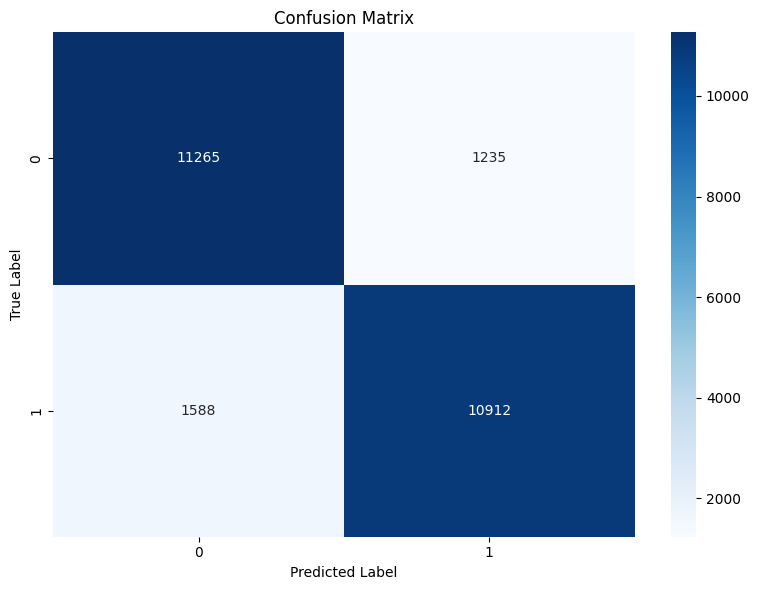

Evaluation Metrics:
Accuracy:  0.8871
Precision: 0.8983
Recall:    0.8730
F1-Score:  0.8855


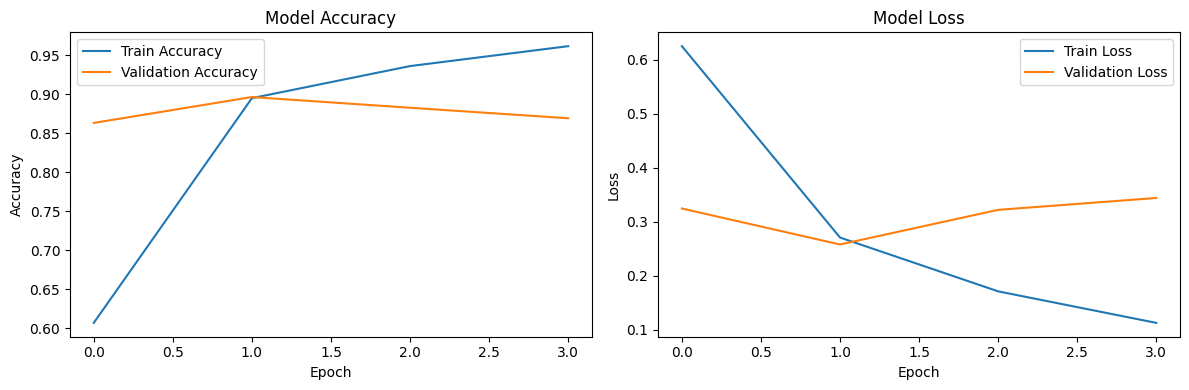


Custom Sentence Sentiment Analysis (GRU):
Input Text: this movie was fantastic i loved it
Predicted Sentiment: Positive
Confidence: 99.68%
---
Input Text: absolutely terrible the worst film ever
Predicted Sentiment: Negative
Confidence: 99.79%
---
Input Text: not bad but could have been better
Predicted Sentiment: Negative
Confidence: 78.28%
---
Input Text: i enjoyed the story and the acting was great
Predicted Sentiment: Positive
Confidence: 95.70%
---
Input Text: awful boring and not worth watching
Predicted Sentiment: Negative
Confidence: 96.28%
---


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import re

# Load and preprocess IMDB dataset
def load_imdb_data(num_words=10000, max_length=500):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=num_words)
    x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
    x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')
    return x_train, y_train, x_test, y_test

# Prepare tokenizer aligned with IMDB word index
def prepare_tokenizer():
    word_index = tf.keras.datasets.imdb.get_word_index()
    tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
    tokenizer.word_index = {k: (v + 3) for k, v in word_index.items()}  # Offset to align with IMDB preprocessing
    tokenizer.word_index["<PAD>"] = 0
    tokenizer.word_index["<START>"] = 1
    tokenizer.word_index["<UNK>"] = 2
    tokenizer.word_index["<UNUSED>"] = 3
    return tokenizer

# Clean input text for consistency
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-z0-9\s]", "", text)  # Remove punctuation
    return text

# Create GRU model
def create_gru_model(embedding_dim=128, units=128, dropout_rate=0.5, learning_rate=0.001):
    model = Sequential([
        Embedding(10000, embedding_dim, input_length=500),
        GRU(units, return_sequences=True, dropout=dropout_rate),  # Changed return_sequences to True
        GRU(units, dropout=dropout_rate, return_sequences=True), # Changed return_sequences to True for the second GRU layer
        GlobalAveragePooling1D(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Comprehensive evaluation function
def evaluate_model(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_binary)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    # Print metrics
    print("Evaluation Metrics:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

# Predict sentiment for custom input text
def predict_sentiment(model, tokenizer, text):
    text = clean_text(text)  # Preprocess input text
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=500, padding='post', truncating='post')
    prediction = model.predict(padded_seq, verbose=0)[0][0]

    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"Input Text: {text}")
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Confidence: {confidence:.2%}")

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Load and preprocess IMDB data
    x_train, y_train, x_test, y_test = load_imdb_data()
    tokenizer = prepare_tokenizer()

    # Split training data into train and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

    # Create and train the GRU model
    gru_model = create_gru_model()
    gru_history = gru_model.fit(
        x_train, y_train,
        epochs=15,
        batch_size=16,
        validation_data=(x_val, y_val),
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)],
        verbose=1
    )

    # Evaluate GRU model on test data
    gru_y_pred = gru_model.predict(x_test, verbose=0)
    evaluate_model(y_test, gru_y_pred)

    # Plot GRU training history
    plot_training_history(gru_history)

    # Custom input predictions with GRU model
    test_sentences = [
        "This movie was fantastic, I loved it!",
        "Absolutely terrible, the worst film ever.",
        "Not bad, but could have been better.",
        "I enjoyed the story and the acting was great.",
        "Awful, boring, and not worth watching."
    ]
    print("\nCustom Sentence Sentiment Analysis (GRU):")
    for sentence in test_sentences:
        predict_sentiment(gru_model, tokenizer, sentence)
        print("---")
# Run the main function
if __name__ == '__main__':
    main()